# Problem Statement
<br>
The Advertising dataset captures sales revenue generated with respect to advertisiment spends across multiple channels like radio, tv and newspaper<br>
<br>
Units of tv, radio and newspaper are given in 1000$ and sales is given in million dollar

# Objectives
<br>
1. Build a linear regression model to:<br>
- Interpret the coefficients of the model<br>
- Make predictions<br>
- Find and analyze model residuals<br>
- Evaluate model efficiency using RMSE and R-Squared values

In [1]:
# importing necessaty libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # visualization library
import seaborn as sns # visulaization library
from scipy.stats import trim_mean
import wquantiles # used to calculate the wighted quantiles
from statsmodels import robust # for calculating the mean absolute deviaition
from scipy.stats import norm
%matplotlib inline

In [6]:
df = pd.read_csv("C:\\Users\\sageo\\OneDrive\\Desktop\\machine learning\\Advertising.csv",index_col=0)

In [7]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# EDA 

In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.shape

(200, 4)

In [6]:
df.isnull().any()

TV           False
radio        False
newspaper    False
sales        False
dtype: bool

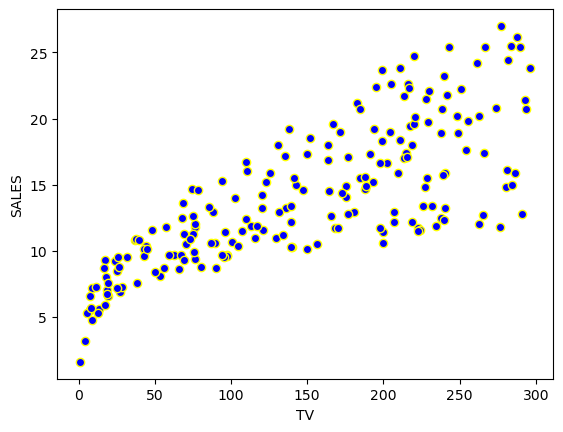

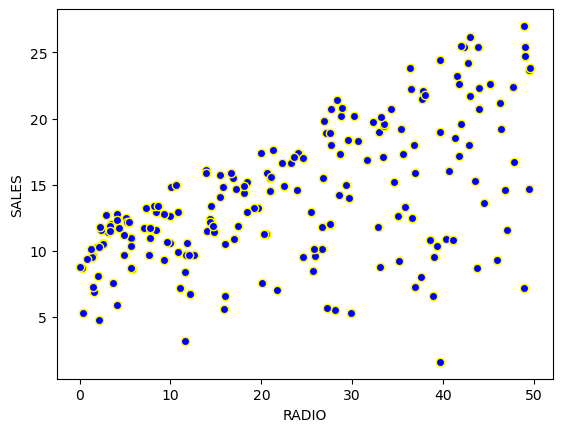

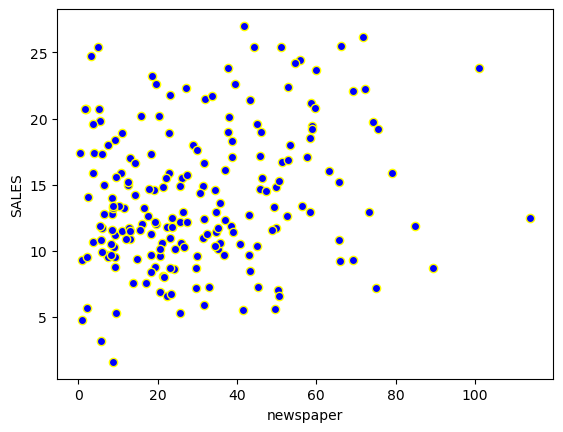

In [7]:
plt.scatter(df['TV'],df['sales'],color='blue',edgecolors='yellow',marker='o',alpha=1)
plt.xlabel('TV')
plt.ylabel('SALES')
plt.show()

plt.scatter(df['radio'],df['sales'],color='blue',edgecolors='yellow',marker='o',alpha=1)
plt.xlabel('RADIO')
plt.ylabel('SALES')
plt.show()

plt.scatter(df['newspaper'],df['sales'],color='blue',edgecolors='yellow',marker='o',alpha=1)
plt.xlabel('newspaper')
plt.ylabel('SALES')
plt.show()

# Simple Linear Regression
<br>
Since we are performing simple linear regression only one feature has been taken for predection.

In [8]:
feature_cols = ['TV'] # since we are doing simple linear regression, we have taken only one feature
x = df[feature_cols]
y = df.sales

# Train Test Split 

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [10]:
print(f'shape of x_train is {x_train.shape}')
print(f'shape of y_train is {y_train.shape}')
print(f'shape of x_test is {x_test.shape}')
print(f'shape of y_test is {y_test.shape}')

shape of x_train is (140, 1)
shape of y_train is (140,)
shape of x_test is (60, 1)
shape of y_test is (60,)


# Fitting the model to our training data 

In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

# Checking the intercept and coefficient 

In [12]:
print(f'The intercept is {lm.intercept_}') #gives the intercept
print(f'The coefficient is {lm.coef_}') # gives the coefficient

The intercept is 7.239459830751138
The coefficient is [0.0464078]


# Prediction for train and test dataset 

In [13]:
preds_train = lm.predict(x_train)
preds_test =  lm.predict(x_test)

In [14]:
preds_train

array([20.43319798, 15.82026244, 12.47890069,  8.34396552, 20.73020791,
        8.13977119, 20.86479054,  8.10728573, 13.47202766,  8.42749957,
       11.89880316, 10.96136556, 15.98268975, 15.45364081, 13.07292056,
       16.96653516, 13.87113475, 15.82026244, 17.56055502, 18.45622561,
        8.03767403, 12.83159999, 11.40223968, 16.10799082, 10.74324889,
       16.2054472 , 11.21660847, 19.62570222,  9.07256801, 19.36581853,
        7.85204282, 16.2286511 , 20.99473238, 19.56537208, 17.20321495,
       14.18670781, 13.35136737,  9.90790845, 18.38197312, 13.79688227,
       15.62999046, 11.7502982 , 17.4723802 , 13.75047447, 19.09201249,
       11.7038904 , 10.30701555, 18.34484688, 15.39331066, 18.38197312,
        8.07015949, 17.9178951 , 20.40071251, 15.18911634, 16.47925323,
       12.95226027, 13.32352269,  8.40429566, 14.82713548, 18.785721  ,
       16.63703976,  7.84740204,  7.42973182, 11.59715245, 19.44007101,
       17.83436106, 19.01776001, 18.52583731, 18.36805078, 17.82

# Assesing model performance through various metrics 

In [15]:
from sklearn.metrics import r2_score,mean_squared_error
print(f"RMSE for train daata is : {np.sqrt(mean_squared_error(y_train,preds_train))}")
print(f'R2 for train data is : {r2_score(y_train,preds_train)}')
print(f'RMSE for test data is : {np.sqrt(mean_squared_error(y_test,preds_test))}')
print(f'R2 for test data is : {r2_score(y_test,preds_test)}')
      

RMSE for train daata is : 3.3450117024237263
R2 for train data is : 0.5736021199591975
RMSE for test data is : 2.9951613049072354
R2 for test data is : 0.6714477229302764


Text(0, 0.5, 'Sales')

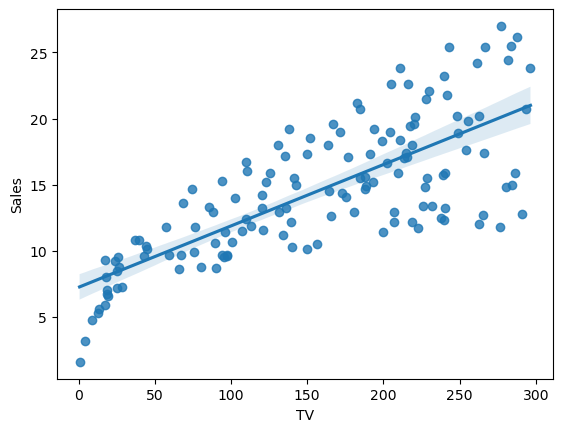

In [16]:
sns.regplot(x=np.reshape(x_train,newshape=(140,)),y=np.reshape(y_train,newshape=(140,)))
plt.xlabel('TV')
plt.ylabel('Sales')

# Simple Linear Regression using statsmodels 

In [17]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train) # this gives the intercept
model = sm.OLS(y_train,x_train).fit()

In [18]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     185.6
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           2.55e-27
Time:                        15:22:43   Log-Likelihood:                -367.70
No. Observations:                 140   AIC:                             739.4
Df Residuals:                     138   BIC:                             745.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2395      0.604     11.986      0.0

# Interpretation
<br>
- P-value is 0.000 which is less than 0.05. It means the variable is significant<br>
- The R-squared value is 0.574, which equates to 57%, indicating an average fit but not an exceptionally strong one.

# Multiple Linear Regression

**Using multiple linear regression**

In [19]:
feature_cols = ['TV','radio','newspaper']
x = df[feature_cols]
y = df.sales

**Train-test split**

In [20]:
from sklearn import model_selection as ms
xtrain, xtest, ytrain, ytest = ms.train_test_split(x,y,test_size=0.3, random_state=42)

**Standardizing the dataset**

In [21]:
from sklearn.preprocessing import StandardScaler # fit vs transform vs fit_transform
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [22]:
xtrain

array([[ 1.53003874e+00, -8.86292904e-01, -1.16598019e+00],
       [ 3.41038651e-01, -1.73144262e-01, -4.09601321e-01],
       [-5.20208901e-01, -4.20003407e-01,  3.95263370e-01],
       [-1.58600275e+00,  7.93720724e-01,  1.71892638e+00],
       [ 1.60659408e+00, -1.33201081e+00, -1.06415995e+00],
       [-1.63863454e+00, -5.16004186e-01, -3.95055573e-01],
       [ 1.64128322e+00,  2.86288037e-01, -1.38901498e+00],
       [-1.64700778e+00, -7.83434927e-01, -3.41721166e-01],
       [-2.64226989e-01, -1.27715322e+00, -1.02537129e+00],
       [-1.56447156e+00,  1.06115147e+00, -1.02537129e+00],
       [-6.69731045e-01, -9.54864889e-01, -1.30174050e+00],
       [-9.11358830e-01, -1.61315594e+00, -1.03021988e+00],
       [ 3.82904851e-01, -3.72003018e-01, -2.35052352e-01],
       [ 2.46540656e-01,  6.77148350e-01,  4.00111952e-01],
       [-3.67098225e-01,  9.17150297e-01,  2.36378785e+00],
       [ 6.36494408e-01, -2.00573056e-01, -9.57491140e-01],
       [-1.61355754e-01,  3.96003212e-01

**Training the model**

In [23]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

**Checking the intercept and the coefficients**

In [24]:
print(f'The intercept is {lm.intercept_}') #gives the intercept
print(f'The coefficient is {lm.coef_}') # gives the coefficient

The intercept is 14.497142857142858
The coefficient is [3.68334078 2.90625242 0.14194772]


**Prediction**

In [25]:
preds_train = lm.predict(xtrain)
preds_test =  lm.predict(xtest)

In [26]:
preds_train

array([17.39149783, 15.19196153, 11.41650701, 11.20610472, 16.39256165,
        6.90577778, 21.17740606,  6.10528574,  9.66662607, 11.67308587,
        9.0704377 ,  6.30582199, 14.7930121 , 17.42999512, 16.14599956,
       16.12273906, 14.9308629 , 19.61593142, 13.70741553, 21.09067507,
       13.09101877, 13.79551693,  8.87971636, 16.97348947,  8.22902448,
       15.34026923, 13.95862675, 23.23157581, 12.67992504, 23.10768546,
        6.80057243, 18.81832259, 23.69669553, 18.39890879, 16.97890645,
       16.44055305, 12.41657918, 11.94072527, 16.7732918 , 14.5933997 ,
       13.22910727,  7.49691601, 19.30121038,  9.33105452, 19.3603766 ,
       10.16463427,  6.94369039, 16.52918217, 13.53571009, 14.80225851,
       11.13948107, 20.85632272, 24.02985438, 18.427486  , 17.84570024,
       15.11333638, 17.21352856,  9.2345359 , 17.29735156, 19.22919752,
       16.29255016,  3.54203145,  5.24055709, 15.86268553, 15.12384811,
       16.31596188, 18.34249185, 23.4941462 , 14.34540589, 20.48

**Assesing Model Performance**

In [27]:
from sklearn.metrics import r2_score,mean_squared_error
print(f"RMSE for train daata is : {np.sqrt(mean_squared_error(ytrain,preds_train))}")
print(f'R2 for train data is : {r2_score(ytrain,preds_train)}')
print(f'RMSE for test data is : {np.sqrt(mean_squared_error(ytest,preds_test))}')
print(f'R2 for test data is : {r2_score(ytest,preds_test)}')

RMSE for train daata is : 1.574596830590544
R2 for train data is : 0.9055159502227753
RMSE for test data is : 1.9485372043446385
R2 for test data is : 0.8609466508230368


**Multiple Linear Regression using statsmodels**

In [28]:
import statsmodels.api as sm

# Fit your model for
model_trained = sm.OLS(ytrain, sm.add_constant(preds_train)).fit()

# Get the adjusted R-squared for trained data
print("Adjusted R-squared for trained data:", model_trained.rsquared_adj)

# Get the adjusted R-squared for test data
model_tested = sm.OLS(ytest, sm.add_constant(preds_test)).fit()
print("Adjusted R-squared for test data:", model_tested.rsquared_adj)

Adjusted R-squared for trained data: 0.9048312831954041
Adjusted R-squared for test data: 0.8592102620774761


In [29]:
# Another way
xtrain = sm.add_constant(xtrain)
model = sm.OLS(ytrain,xtrain).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           1.88e-69
Time:                        15:22:43   Log-Likelihood:                -262.21
No. Observations:                 140   AIC:                             532.4
Df Residuals:                     136   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4971      0.135    107.370      0.000      14.230      14.764
x1             3.6833      0.135     27.219      0.000       3.416       3.951
x2             2.9063      0.144     20.195      0.000       2.622       3.191
x3             0.1419      0.144      0.988      0.325      -0.142       0.426
==============================================================================
Omnibus:                       68.437   Durbin-Watson:                   2.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.342
Skew:                          -1.709   Prob(JB):                     2.25e-71
Kurtosis:                       9.640   Cond. No.                         1.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Assumptions of Linear Regression 

- Linearity: Linearity between dependent & independent variables.
- Normality of residuals: The residuals should be normally distributed. This means that the errors should follow a bell-shaped curve when plotted. (Here by we do not mean a cost function such as RMSE, MSE, MAE, etc as they are just single value)
- Multicollinearity: Independent variables(x1,x2,x3....xn) should not have a relationship between them or Predictor variables are independent of each other.
- Hetroscedesticity: if we draw a graph for predicted data and the errors, there should be no pattern.
- No autocorrelation of errors: Errors should not be correlated with each other.
- No endogeneity of errors: Errors and independent variables are correlated. (Hausman Test)